In [214]:
### desafio 4

In [215]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,6)

### Importo librerias

In [216]:
df = pd.read_csv('dropeado02.csv').drop(columns='Unnamed: 0')

In [217]:
df.head().T

0   1   2     3   4
income_recod                  0   0   1     1   0
age                          25  38  28    44  34
educational_num               7   9  12    10   6
capital_gain                  0   0   0  7688   0
capital_loss                  0   0   0     0   0
hours_per_week               40  50  40    40  30
workclass_Unemployed          0   0   0     0   0
workclass_FederalGov          0   0   0     0   0
workclass_StateLevelGov       0   0   1     0   0
workclass_SelfEmployed        0   0   0     0   0
educ_preschool                0   0   0     0   0
educ_elementary_school        0   0   0     0   0
educ_university               0   0   0     0   0
educ_college                  0   0   1     1   0
civstatus_widowed             0   0   0     0   0
civstatus_separated           0   0   0     0   0
civstatus_divorced            0   0   0     0   0
civstatus_neverm              1   0   0     0   1
collars_others                0   0   0     0   1
collars_blue_collar           1   1   1     1   0
relationship_Other_relative   0   0   0     0   0
relationship_Wife             0   0   0     0   0
relationship_Unmarried        0   0   0     0   0
relationship_Own_child        1   0   0     0   0
relationship_Not_in_family    0   0   0     0   1
race_Other                    0   0   0     0   0
race_Amer_Indian_Eskimo       0   0   0     0   0
race_Asian_Pac_Islander       0   0   0     0   0
race_Black                    1   0   0     1   0
gender_Female                 0   0   0     0   0
region_Europe                 0   0   0     0   0
region_Asia                   0   0   0     0   0

In [218]:
df_analisis = df.loc[:, 'age': 'region_Asia']
type(df_analisis)

pandas.core.frame.DataFrame

In [219]:
# Primero: escalar las variables
df_columns = df_analisis.columns
df_columns

Index(['age', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Unemployed', 'workclass_FederalGov',
       'workclass_StateLevelGov', 'workclass_SelfEmployed', 'educ_preschool',
       'educ_elementary_school', 'educ_university', 'educ_college',
       'civstatus_widowed', 'civstatus_separated', 'civstatus_divorced',
       'civstatus_neverm', 'collars_others', 'collars_blue_collar',
       'relationship_Other_relative', 'relationship_Wife',
       'relationship_Unmarried', 'relationship_Own_child',
       'relationship_Not_in_family', 'race_Other', 'race_Amer_Indian_Eskimo',
       'race_Asian_Pac_Islander', 'race_Black', 'gender_Female',
       'region_Europe', 'region_Asia'],
      dtype='object')

In [220]:
type(df_columns)

pandas.core.indexes.base.Index

In [221]:
# Primero, dividir la muestra en grupos de entrenamiento y validación, usando todas las variables en el df
X_train, X_test, y_train, y_test= train_test_split(df_analisis,df['income_recod'], test_size=.33, random_state=16254)


In [222]:
scaler = StandardScaler() 
#estandarizar las matrices

X_train_std = StandardScaler().fit_transform(X_train)
# ejecuta dos pasos: estima puntos, genera y expone los puntos a una matriz valida
X_test_std = StandardScaler().fit_transform(X_test)


In [223]:
# X_train y X_test quedan como arrays de Numpy, convertir a df para mayor facilidad de uso
X_train_std = pd.DataFrame(X_train)
X_train_std.columns = df_columns
X_train_std.head()

age  educational_num  capital_gain  capital_loss  hours_per_week  \
39518   54               10             0             0              40   
8200    65                9             0             0              40   
12000   64               14             0             0              40   
16924   41               10             0             0              16   
28482   46                4             0          1651              40   

       workclass_Unemployed  workclass_FederalGov  workclass_StateLevelGov  \
39518                     0                     0                        0   
8200                      0                     0                        0   
12000                     0                     0                        0   
16924                     0                     0                        0   
28482                     0                     0                        0   

       workclass_SelfEmployed  educ_preschool  ...  relationship_Unmarried  \
39518                       0               0  ...                       0   
8200                        0               0  ...                       0   
12000                       1               0  ...                       0   
16924                       0               0  ...                       0   
28482                       0               0  ...                       0   

       relationship_Own_child  relationship_Not_in_family  race_Other  \
39518                       0                           0           0   
8200                        0                           1           0   
12000                       0                           0           0   
16924                       0                           0           0   
28482                       0                           0           0   

       race_Amer_Indian_Eskimo  race_Asian_Pac_Islander  race_Black  \
39518                        0                        0           0   
8200                         0                        1           0   
12000                        0                        0           0   
16924                        0                        0           0   
28482                        0                        1           0   

       gender_Female  region_Europe  region_Asia  
39518              0              0            0  
8200               0              0            1  
12000              0              0            0  
16924              0              0            0  
28482              0              0            1  

[5 rows x 31 columns]

In [224]:
X_test_std = pd.DataFrame(X_test)
X_test_std.columns = df_columns
X_test_std.head()

age  educational_num  capital_gain  capital_loss  hours_per_week  \
34648   17                6             0             0              14   
27660   38               10             0             0              40   
33669   21                9             0             0              28   
6702    29               11             0             0              40   
2715    48               13             0             0              65   

       workclass_Unemployed  workclass_FederalGov  workclass_StateLevelGov  \
34648                     0                     0                        0   
27660                     0                     0                        0   
33669                     0                     0                        0   
6702                      0                     0                        0   
2715                      0                     0                        0   

       workclass_SelfEmployed  educ_preschool  ...  relationship_Unmarried  \
34648                       0               0  ...                       0   
27660                       0               0  ...                       0   
33669                       0               0  ...                       0   
6702                        0               0  ...                       0   
2715                        0               0  ...                       0   

       relationship_Own_child  relationship_Not_in_family  race_Other  \
34648                       1                           0           0   
27660                       0                           0           0   
33669                       0                           1           0   
6702                        0                           0           0   
2715                        0                           1           0   

       race_Amer_Indian_Eskimo  race_Asian_Pac_Islander  race_Black  \
34648                        0                        0           0   
27660                        0                        0           0   
33669                        0                        0           0   
6702                         0                        0           0   
2715                         0                        0           0   

       gender_Female  region_Europe  region_Asia  
34648              1              0            0  
27660              0              0            0  
33669              1              0            0  
6702               0              0            0  
2715               0              0            0  

[5 rows x 31 columns]

In [225]:
# MODELO 1: con todas las variables
###########

In [226]:
#sin alterar hiperparámetros, iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
model_logist1 = LogisticRegression().fit(X_train_std, y_train)

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
model_logist1.coef_
# coeficientes : cada uno de los parametros que afecta la comb. lineal de las predicciones

array([[ 1.48666189e-02,  7.60348415e-02,  3.13948791e-04,
         6.72174989e-04,  2.10227417e-02, -1.86511823e-02,
         4.72260022e-01, -1.01624853e-01, -2.05578910e-01,
        -8.17281804e-02, -5.02951242e-01,  1.21185425e+00,
         4.58554203e-01, -5.76135747e-01, -7.77894547e-01,
        -1.01530995e+00, -1.46937735e+00, -1.37387865e+00,
        -5.38673818e-01, -8.72778665e-01,  1.06383595e+00,
        -1.14599044e+00, -1.63950596e+00, -7.99693015e-01,
        -9.30257154e-02, -2.98448702e-01, -1.19499126e-02,
        -3.17108950e-01, -9.05251840e-01,  7.64868373e-02,
        -2.41915451e-01]])

In [228]:
type(model_logist1.coef_)

numpy.ndarray

In [229]:
model_logist1.intercept_
# intercepto

array([-2.93188464])

In [230]:
# Con nuestro modelo entrenado, ahora haremos las predicciones
ythat1 = model_logist1.predict(X_test_std)
ythat1[:20]
# por defecto el modelo devuelve la clase asignada 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [231]:
ythat_pr = model_logist1.predict_proba(X_test_std)
ythat_pr[:10]

# ASI DEVUELVE UN ARRAY DE LISTAS EN DONDE ASIGNA LA PROBABILIDAD DE CLASE 0 Y CLASE 1
#Se asigna el mayor primero

array([[9.99336049e-01, 6.63950699e-04],
       [6.99688435e-01, 3.00311565e-01],
       [9.97254208e-01, 2.74579199e-03],
       [5.90227413e-01, 4.09772587e-01],
       [5.57023103e-01, 4.42976897e-01],
       [9.70314276e-01, 2.96857243e-02],
       [6.32834796e-01, 3.67165204e-01],
       [3.16713746e-02, 9.68328625e-01],
       [9.35329847e-01, 6.46701527e-02],
       [9.88647813e-01, 1.13521865e-02]])

In [232]:
from sklearn.metrics import confusion_matrix

m1_confusion = confusion_matrix(y_test, ythat1)
# 1. CUALES SON LOS CASOS REALES DEL VECTOR OBJETIVO DE VALIDACION
# 2. LAS ETIQUETAS PREDICHAS

m1_confusion

array([[10409,   841],
       [ 1577,  2071]], dtype=int64)

In [233]:
# CRUCE ENTRE AMBAS ETIQUETAS , PERMITE VER LAS PREDICHAS CON LAS OBSERVADAS 
# LA DIAGONAL PRINCIPAL REPORTA LOS CASOS EXISTOSAMENTE PREDICHOS

In [234]:
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test, ythat1)
m1_acc

0.837696335078534

In [235]:
print('El modelo presenta un', m1_acc, 'de exactitud promedio')

print('Sin embargo, se debe comparar frente al caso de identificar aleatoriamente una observacion correctamente..para ello utilizaremos 0,5')


El modelo presenta un 0.837696335078534 de exactitud promedio
Sin embargo, se debe comparar frente al caso de identificar aleatoriamente una observacion correctamente..para ello utilizaremos 0,5


In [236]:
m1_acc - .5

0.337696335078534

In [237]:
print('El modelo presenta un desempeño', m1_acc - .5, '% superior que un clasificador aleatorio')


El modelo presenta un desempeño 0.337696335078534 % superior que un clasificador aleatorio


In [238]:
from sklearn.metrics import precision_score
m1_prec = precision_score(y_test, ythat1)
m1_prec

0.711195054945055

In [239]:
print('Hay una precision de este modelo de', m1_prec, '%', 'o un', 1-m1_prec, 'superior que un clasificacor aleatorio de identificar correctamente las etiquetas dentro de las positivas')

Hay una precision de este modelo de 0.711195054945055 % o un 0.28880494505494503 superior que un clasificacor aleatorio de identificar correctamente las etiquetas dentro de las positivas


In [240]:
from sklearn.metrics import recall_score
m1_recall = recall_score(y_test, ythat1)
m1_recall

0.5677083333333334

In [241]:
from sklearn.metrics import  f1_score
m1_fscore = f1_score(y_test, ythat1)
m1_fscore

0.6314024390243903

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ythat1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11250
           1       0.71      0.57      0.63      3648

    accuracy                           0.84     14898
   macro avg       0.79      0.75      0.76     14898
weighted avg       0.83      0.84      0.83     14898



In [243]:
from sklearn.metrics import roc_curve 
ythat_pr = model_logist1.predict_proba(X_test)[:,1]
false_positive, true_positive, threshold = roc_curve(y_test, ythat_pr)

In [244]:
false_positive.shape

(4357,)

0.7464763888888889

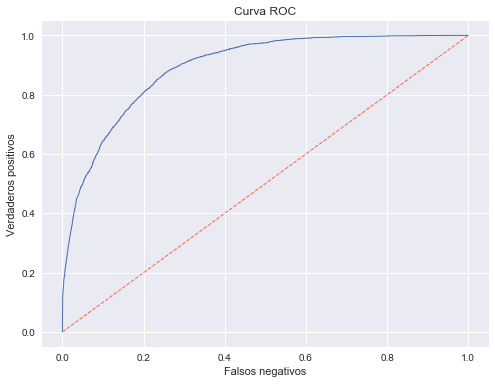

In [269]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0,1],  linestyle = '--', lw=1, color='tomato')
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos negativos')
roc_auc_score(y_test, yhat1)

EL AREA DE LA CURVA ROC ES DE UN 74 %. ES DECIR, SEGUN LA CURA ROC, EL MODELO ES UN  24 % SUPERIOR A UN CLASIFICADOR ALEATORIO

In [278]:
### Validación cruzada
from sklearn.model_selection import cross_val_score
m1_cv = cross_val_score(LogisticRegression(),X= df_analisis, y= df['income_recod'],
                        cv=3,scoring = 'f1')

m1_cv

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.65183207, 0.64193838, 0.65952381])

In [275]:
np.mean(m1_cv)

0.6510980868727981

In [276]:
np.std(m1_cv)

0.0071979578287609675

### #### Cuando promediamos cada una de estas iteraciones obtenemos que la evaluacion del modelo se mantiene estable alrededor del 65 con una std baja en comparacion al f1 original sin validacion obtenemos un aumento del ????? en su desempeño

### Modelo 2 
EL SIGUIENTE MODELO SE REALIZARA CON LAS VARIABLES DETERMINANTES OBTENIDAS EN EL HITO 3

In [279]:
df_determinantes = df.loc[:,[ 'age','educational_num','capital_gain','capital_loss','hours_per_week',
                          'workclass_FederalGov', 'workclass_SelfEmployed','civstatus_widowed',
                          'civstatus_separated','civstatus_divorced','civstatus_neverm','collars_others',
                          'collars_blue_collar','relationship_Other_relative', 'relationship_Wife',
                          'relationship_Unmarried','relationship_Own_child', 'relationship_Not_in_family',
                          'race_Amer_Indian_Eskimo','race_Black','gender_Female','region_Asia']]


In [280]:
df_determinantes_col = df_determinantes.columns
df_determinantes_col

Index(['age', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_FederalGov', 'workclass_SelfEmployed',
       'civstatus_widowed', 'civstatus_separated', 'civstatus_divorced',
       'civstatus_neverm', 'collars_others', 'collars_blue_collar',
       'relationship_Other_relative', 'relationship_Wife',
       'relationship_Unmarried', 'relationship_Own_child',
       'relationship_Not_in_family', 'race_Amer_Indian_Eskimo', 'race_Black',
       'gender_Female', 'region_Asia'],
      dtype='object')

In [281]:
X_train_det = X_train.loc[:, df_determinantes_col]
X_train_det.head()

age  educational_num  capital_gain  capital_loss  hours_per_week  \
39518   54               10             0             0              40   
8200    65                9             0             0              40   
12000   64               14             0             0              40   
16924   41               10             0             0              16   
28482   46                4             0          1651              40   

       workclass_FederalGov  workclass_SelfEmployed  civstatus_widowed  \
39518                     0                       0                  0   
8200                      0                       0                  0   
12000                     0                       1                  0   
16924                     0                       0                  0   
28482                     0                       0                  0   

       civstatus_separated  civstatus_divorced  ...  collars_blue_collar  \
39518                    0                   0  ...                    0   
8200                     0                   0  ...                    0   
12000                    0                   0  ...                    1   
16924                    0                   0  ...                    1   
28482                    0                   0  ...                    0   

       relationship_Other_relative  relationship_Wife  relationship_Unmarried  \
39518                            0                  0                       0   
8200                             0                  0                       0   
12000                            0                  0                       0   
16924                            0                  0                       0   
28482                            0                  0                       0   

       relationship_Own_child  relationship_Not_in_family  \
39518                       0                           0   
8200                        0                           1   
12000                       0                           0   
16924                       0                           0   
28482                       0                           0   

       race_Amer_Indian_Eskimo  race_Black  gender_Female  region_Asia  
39518                        0           0              0            0  
8200                         0           0              0            1  
12000                        0           0              0            0  
16924                        0           0              0            0  
28482                        0           0              0            1  

[5 rows x 22 columns]

In [282]:
X_test_det = X_test.loc[:, df_determinantes_col]
X_test_det.head()

age  educational_num  capital_gain  capital_loss  hours_per_week  \
34648   17                6             0             0              14   
27660   38               10             0             0              40   
33669   21                9             0             0              28   
6702    29               11             0             0              40   
2715    48               13             0             0              65   

       workclass_FederalGov  workclass_SelfEmployed  civstatus_widowed  \
34648                     0                       0                  0   
27660                     0                       0                  0   
33669                     0                       0                  0   
6702                      0                       0                  0   
2715                      0                       0                  0   

       civstatus_separated  civstatus_divorced  ...  collars_blue_collar  \
34648                    0                   0  ...                    0   
27660                    0                   0  ...                    1   
33669                    0                   0  ...                    0   
6702                     0                   0  ...                    0   
2715                     1                   0  ...                    0   

       relationship_Other_relative  relationship_Wife  relationship_Unmarried  \
34648                            0                  0                       0   
27660                            0                  0                       0   
33669                            0                  0                       0   
6702                             0                  0                       0   
2715                             0                  0                       0   

       relationship_Own_child  relationship_Not_in_family  \
34648                       1                           0   
27660                       0                           0   
33669                       0                           1   
6702                        0                           0   
2715                        0                           1   

       race_Amer_Indian_Eskimo  race_Black  gender_Female  region_Asia  
34648                        0           0              1            0  
27660                        0           0              0            0  
33669                        0           0              1            0  
6702                         0           0              0            0  
2715                         0           0              0            0  

[5 rows x 22 columns]

In [283]:
#sin alterar hiperparámetros, iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
model_logist_det = LogisticRegression(fit_intercept=True, C=1.0).fit(X_train_det, y_train)

print(f"Coef:\n{model_logist_det.coef_}")
print(f"\nIntercept:\n{model_logist_det.intercept_}")

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coef:
[[ 2.05173061e-02  2.81290829e-01  3.15566506e-04  6.79877138e-04
   2.70245534e-02  4.04574286e-01 -2.13870324e-01 -7.53411065e-01
  -9.49613210e-01 -9.51871710e-01 -1.34424485e+00 -1.34119285e+00
  -7.42034646e-01 -1.09592828e+00  9.67707172e-01 -9.26694700e-01
  -1.85528275e+00 -9.31900650e-01 -4.57917810e-01 -2.58146764e-01
  -8.16604053e-01 -2.63031264e-01]]

Intercept:
[-5.0490088]


Con nuestro modelo entrenado, ahora haremos las predicciones

In [287]:
ythat_det = model_logist_det.predict(X_test_det)
ythat_det[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [288]:
# preguntando por la probabilidad entre 0 y 1:
yhat_pr_det = model_logist_det.predict_proba(X_test_det)
yhat_pr_det[:5]

array([[9.99661771e-01, 3.38228565e-04],
       [7.53523840e-01, 2.46476160e-01],
       [9.96870610e-01, 3.12939022e-03],
       [5.69258295e-01, 4.30741705e-01],
       [6.30022935e-01, 3.69977065e-01]])

In [295]:
m2_confusion = confusion_matrix(y_test, yhat_det)
# 1. CUALES SON LOS CASOS REALES DEL VECTOR OBJETIVO DE VALIDACION
# 2. LAS ETIQUETAS PREDICHAS
m2_confusion

array([[10369,   881],
       [ 1501,  2147]], dtype=int64)

In [296]:
m2_acc = accuracy_score(y_test, ythat_det)
m2_acc

0.8401127668143374

In [297]:
print('El modelo presenta un', m2_acc, 'de exactitud promedio')

print('Sin embargo, se debe comparar frente al caso de identificar aleatoriamente una observacion correctamente..para ello utilizaremos 0,5')


El modelo presenta un 0.8401127668143374 de exactitud promedio
Sin embargo, se debe comparar frente al caso de identificar aleatoriamente una observacion correctamente..para ello utilizaremos 0,5


In [298]:
print('El modelo presenta un desempeño', m2_acc - .5, '% superior que un clasificador aleatorio')


El modelo presenta un desempeño 0.34011276681433744 % superior que un clasificador aleatorio


In [299]:
m2_prec = precision_score(y_test, ythat_det)
m2_prec

0.7090488771466315

In [301]:
print('Hay una precision de este modelo de', m2_prec, '%', 'o un', 1-m2_prec, 'superior que un clasificacor aleatorio de identificar correctamente las etiquetas dentro de las positivas')

Hay una precision de este modelo de 0.7090488771466315 % o un 0.29095112285336855 superior que un clasificacor aleatorio de identificar correctamente las etiquetas dentro de las positivas


In [302]:
m2_fscore = f1_score(y_test, ythat_det)
m2_fscore

0.6431995206710606

In [303]:
#reportar todas las metricas (resumen)
print(classification_report(y_test, yhat_det))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11250
           1       0.71      0.59      0.64      3648

    accuracy                           0.84     14898
   macro avg       0.79      0.76      0.77     14898
weighted avg       0.83      0.84      0.83     14898



In [304]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1, clase 1:
yhat2_det = model_logist_det.predict_proba(X_test_det)[:, 1]

# generamos los objetos de roc_cruve
false_positive_det, true_positive_det, threshold_det = roc_curve(y_test, yhat2_det)

#verificar puntos generados!
false_positive_det.shape

(4376,)

0.7551152777777778

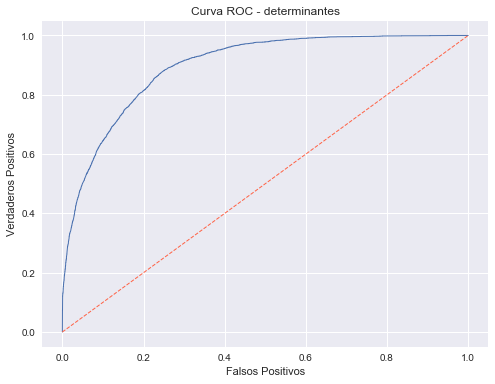

In [305]:
# Plot ROC curve
plt.title('Curva ROC - determinantes')
plt.plot(false_positive_det, true_positive_det, lw=1)
plt.plot([0, 1], ls="--", lw=1, color='tomato')  #bisectriz
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

roc_auc_score(y_test, ythat_det)

EL AREA DE LA CURVA ROC ES DE UN 75 % . SEGUN LA CURvA ROC el modelo es un  25 % SUPERIOR A UN CLASIFICADOR ALEATORIO

#### MODELO 3:


utilizaremos los mismos set del Modelo 2, pero esta vez modificando hiperparámetros


In [307]:
model_logist_par = LogisticRegression(fit_intercept=False, C=2.0).fit(X_train_det, y_train)

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [308]:
#Iniciamos el modelo con la clase LogisticRegression, con cambio de hiperparámetros y pasamos los datos en fit.
model_logist_det2 = LogisticRegression(fit_intercept=False, C=2.0).fit(X_train_det, y_train)
print(f"Coef:\n{model_logist_det2.coef_}")
print(f"\nIntercept:\n{model_logist_det2.intercept_}")

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coef:
[[-1.31883851e-02  9.32886041e-02  3.19251568e-04  6.80793814e-04
  -2.83163086e-03  3.02691214e-01 -1.19910097e-01 -2.98693276e-01
  -5.65940797e-01 -9.10284521e-01 -1.92724811e+00 -1.41984348e+00
  -1.33155452e+00 -6.37482272e-01  7.44896134e-01 -1.10337923e+00
  -1.60899467e+00 -7.54404690e-01 -1.75184952e-01 -4.58273809e-01
  -1.00220230e+00 -1.17569098e-01]]

Intercept:
0.0


In [309]:
ythat_det2 = model_logist_det.predict(X_test_det)
ythat_det[:20]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [310]:
# preguntando por la probabilidad entre 0 y 1:
yhat_pr_det2 = model_logist_det.predict_proba(X_test_det)
yhat_pr_det[:5]

array([[9.99661771e-01, 3.38228565e-04],
       [7.53523840e-01, 2.46476160e-01],
       [9.96870610e-01, 3.12939022e-03],
       [5.69258295e-01, 4.30741705e-01],
       [6.30022935e-01, 3.69977065e-01]])

In [313]:
m3_confusion = confusion_matrix(y_test, yhat_det2)
# 1. CUALES SON LOS CASOS REALES DEL VECTOR OBJETIVO DE VALIDACION
# 2. LAS ETIQUETAS PREDICHAS


In [314]:
m3_confusion

array([[10015,  1235],
       [ 1316,  2332]], dtype=int64)

In [315]:
m3_acc = accuracy_score(y_test, ythat_det2)
m3_acc

0.8401127668143374

In [316]:

print('El modelo presenta un', m3_acc, 'de exactitud promedio')

El modelo presenta un 0.8401127668143374 de exactitud promedio


In [320]:
print('Sin embargo, se debe comparar frente al caso de identificar aleatoriamente una observacion correctamente,',
      'para ello utilizaremos 0,5')


Sin embargo, se debe comparar frente al caso de identificar aleatoriamente una observacion correctamente, para ello utilizaremos 0,5


In [ ]:

print('El modelo presenta un desempeño', m3_acc - .5, '% superior que un clasificador aleatorio')

In [321]:
m3_prec = precision_score(y_test, ythat_det2)
m3_prec


0.7090488771466315

In [322]:
print('Hay una precision de este modelo de', m3_prec, '%', 'o un', 1-m3_prec, 'superior que un clasificacor aleatorio de identificar correctamente las etiquetas dentro de las positivas')

Hay una precision de este modelo de 0.7090488771466315 % o un 0.29095112285336855 superior que un clasificacor aleatorio de identificar correctamente las etiquetas dentro de las positivas


In [323]:
#reportar todas las metricas
print(classification_report(y_test, yhat_det2))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11250
           1       0.65      0.64      0.65      3648

    accuracy                           0.83     14898
   macro avg       0.77      0.76      0.77     14898
weighted avg       0.83      0.83      0.83     14898



In [326]:

# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1, clase 1:
yhat3_det = model_logist_det2.predict_proba(X_test_det)[:, 1]
yhat3_det

array([0.00346213, 0.26637511, 0.00975335, ..., 0.76374708, 0.13507023,
       0.07846406])

In [329]:
# generamos los objetos de roc_cruve
false_positive_det2, true_positive_det2, threshold_det2 = roc_curve(y_test, yhat3_det)

In [330]:
#verificar puntos generados
false_positive_det2.shape

(4512,)

0.7551152777777778

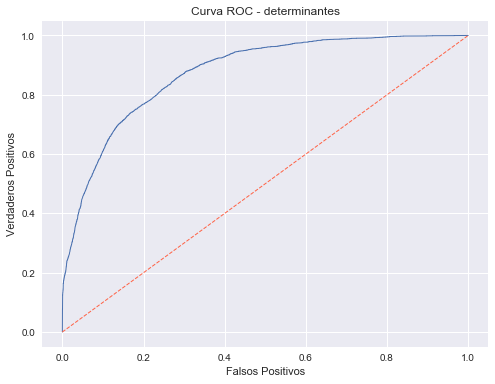

In [331]:
# Plot ROC curve
plt.title('Curva ROC - determinantes')
plt.plot(false_positive_det, true_positive_det, lw=1)
plt.plot([0, 1], ls="--", lw=1, color='tomato')  #bisectriz
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

roc_auc_score(y_test, ythat_det2)



EL AREA DE LA CURVA ROC ES DE UN 75 % . SEGUN LA CURvA ROC el modelo es un 25 % SUPERIOR A UN CLASIFICADOR ALEATORIO

In [333]:
print('Resumen de metricas')
print(classification_report(y_test, ythat1))
print('------------------')
print(classification_report(y_test, yhat_det))
print('------------------')
print(classification_report(y_test, yhat_det2))

Resumen de metricas
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11250
           1       0.71      0.57      0.63      3648

    accuracy                           0.84     14898
   macro avg       0.79      0.75      0.76     14898
weighted avg       0.83      0.84      0.83     14898

------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11250
           1       0.71      0.59      0.64      3648

    accuracy                           0.84     14898
   macro avg       0.79      0.76      0.77     14898
weighted avg       0.83      0.84      0.83     14898

------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11250
           1       0.65      0.64      0.65      3648

    accuracy                           0.83     14898
   macro avg       0.77      0.76      0.77     14898
weighted avg    

AUC Score Modelo 2: 89.59%
AUC Score Modelo 3: 87.43%


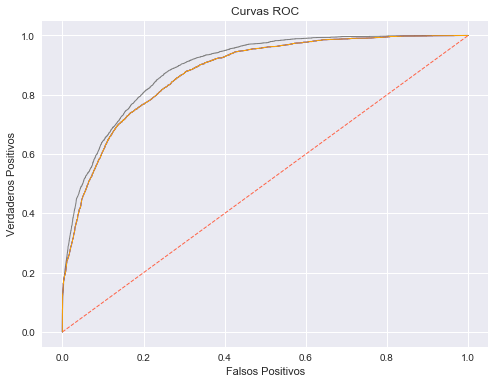

In [334]:
#Observando ahora las Curvas:

# Plot ROC curve modelo 1
plt.title('Curvas ROC')
plt.plot(false_positive, true_positive, lw=1, color='gray')
plt.plot([0, 1], ls="--", lw=1, color='tomato')  #bisectriz
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

# Plot ROC curve modelo 2
plt.plot(false_positive_det, true_positive_det, lw=1, color='blue')
print(f"AUC Score Modelo 2: {round(roc_auc_score(y_test, yhat2_det)*100, 2)}%")

# Plot ROC curve modelo 3
plt.plot(false_positive_det2, true_positive_det2, lw=1, color='orange')
print(f"AUC Score Modelo 3: {round(roc_auc_score(y_test, yhat2_det2)*100, 2)}%")
